1.	Write a Python program using NLTK to extract named entities from the sentence: "Apple Inc. is looking at buying U.K. startup for 1 billion dollar."

2.	Using NLTK, write a function that takes a list of sentences and returns a list of named entities found in each sentence.

3.	Write a Python program that uses NLTK to extract and display all noun phrases from a given text.

4.	Using NLTK, write a program to perform chunking on the sentence: "He reckons the current account deficit will narrow to only     8 billion." and display the chunked tree.

5.	Write a Python function using NLTK that takes a sentence as input and returns all verb phrases (VP) present in the sentence.

1.	Write a Python program using NLTK to extract named entities from the sentence: "Apple Inc. is looking at buying U.K. startup for 1 billion dollar."

In [1]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk

# Download necessary resources
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def extract_named_entities(sentence):
    words = word_tokenize(sentence)
    tagged = pos_tag(words)
    tree = ne_chunk(tagged)
    
    named_entities = []
    for subtree in tree:
        if isinstance(subtree, nltk.Tree):
            entity = " ".join([word for word, tag in subtree])
            named_entities.append(entity)
    
    return named_entities

# Example usage:
sentence = "Apple Inc. is looking at buying U.K. startup for $1 billion."
print(extract_named_entities(sentence))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


['Apple', 'Inc.']


2.	Using NLTK, write a function that takes a list of sentences and returns a list of named entities found in each sentence.

In [2]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk

# Download necessary resources
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

def extract_named_entities_with_pos(sentences):
    named_entities_list = []

    for sentence in sentences:
        tokens = word_tokenize(sentence)
        pos_tags = pos_tag(tokens)
        ne_tree = ne_chunk(pos_tags)

        entities = []

        for subtree in ne_tree:
            if isinstance(subtree, nltk.Tree):  # Named entity subtree
                entity_name = " ".join([word for word, tag in subtree])
                entity_type = subtree.label()
                pos_info = [(word, tag) for word, tag in subtree]
                entities.append({
                    'entity': entity_name,
                    'type': entity_type,
                    'pos_tags': pos_info
                })

        named_entities_list.append(entities)

    return named_entities_list

# Example usage
sentences = [
    "Apple Inc. is looking at buying U.K. startup for $1 billion.",
    "Elon Musk founded SpaceX in 2002."
]

result = extract_named_entities_with_pos(sentences)

# Display results
for i, ents in enumerate(result):
    print(f"\nSentence {i+1}:")
    for ent in ents:
        print(f"Entity: {ent['entity']}, Type: {ent['type']}, POS Tags: {ent['pos_tags']}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!



Sentence 1:
Entity: Apple, Type: PERSON, POS Tags: [('Apple', 'NNP')]
Entity: Inc., Type: ORGANIZATION, POS Tags: [('Inc.', 'NNP')]

Sentence 2:
Entity: Elon, Type: PERSON, POS Tags: [('Elon', 'NNP')]
Entity: Musk, Type: PERSON, POS Tags: [('Musk', 'NNP')]
Entity: SpaceX, Type: ORGANIZATION, POS Tags: [('SpaceX', 'NNP')]


3.	Write a Python program that uses NLTK to extract and display all noun phrases from a given text.

In [3]:
import nltk
from nltk import word_tokenize, pos_tag, RegexpParser

# Download necessary resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def extract_noun_phrases(text):
    words = word_tokenize(text)
    tagged = pos_tag(words)
    
    # Define the grammar for noun phrases
    grammar = "NP: {<DT>?<JJ>*<NN.*>+}"
    parser = RegexpParser(grammar)
    
    tree = parser.parse(tagged)
    
    noun_phrases = []
    for subtree in tree.subtrees(filter=lambda t: t.label() == 'NP'):
        noun_phrases.append(" ".join(word for word, tag in subtree))
    
    return noun_phrases

# Example usage:
text = "The quick brown fox jumped over the lazy dog."
print(extract_noun_phrases(text))


['The quick brown fox', 'the lazy dog']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


4.	Using NLTK, write a program to perform chunking on the sentence: "He reckons the current account deficit will narrow to only 8 billion." and display the chunked tree.

  Obtaining dependency information for svgling from https://files.pythonhosted.org/packages/87/d0/570cbaff44446824b08084c1ce4b47efca0727a5a9bf11c233177ea09b05/svgling-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for svgwrite from https://files.pythonhosted.org/packages/84/15/640e399579024a6875918839454025bb1d5f850bb70d96a11eabb644d11c/svgwrite-1.4.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/67.1 kB ? eta -:--:--
   ------------------ --------------------- 30.7/67.1 kB ? eta -:--:--
   ---------------------------------------- 67.1/67.1 kB 902.9 kB/s eta 0:00:00
(S
  He/PRP
  reckons/VBZ
  (NP the/DT current/JJ account/NN deficit/NN)
  will/MD
  narrow/VB
  to/TO
  only/RB
  8/CD
  billion/CD
  ./.)


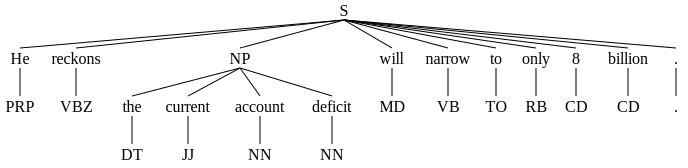

In [4]:
!pip install svgling

import svgling
import nltk
from nltk.tree import Tree
from IPython.display import display # Import display

sentence = "He reckons the current account deficit will narrow to only 8 billion."
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

grammar = r"""
    NP: {<DT>?<JJ>*<NN.*>+}
    VP: {<VB.*><NP|PP|CLAUSE>+$}
    PP: {<IN><NP>}
"""
chunk_parser = RegexpParser(grammar)
chunked = chunk_parser.parse(pos_tags)

print(chunked)
display(chunked)  # Use display instead of chunked.draw()

5.	Write a Python function using NLTK that takes a sentence as input and returns all verb phrases (VP) present in the sentence.

In [5]:
import nltk
from nltk import word_tokenize, pos_tag
from nltk.chunk import RegexpParser

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def extract_verb_phrases(sentence):
    tokens = word_tokenize(sentence)
    pos_tags = pos_tag(tokens)

    # Improved grammar for verb phrases
    grammar = r"""
        VP: {<MD>?<VB.*>+<NP|PP|CLAUSE>*}
    """

    chunk_parser = RegexpParser(grammar)
    chunked_tree = chunk_parser.parse(pos_tags)

    verb_phrases = []
    for subtree in chunked_tree.subtrees():
        if subtree.label() == 'VP':
            verb_phrases.append(" ".join(word for word, tag in subtree.leaves()))

    return verb_phrases

sentence = "She is writing a research paper on artificial intelligence."
print(extract_verb_phrases(sentence))

['is writing']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
